In [96]:
import pandas as pd
import json
import ndjson
import dask.bag as db
from dask.diagnostics import ProgressBar

In [97]:
user_tweets_bag = db.read_text("D:/Research/causal_inference_data2/retweeters/*.ndjson").map(json.loads)
user_retweets = user_tweets_bag.to_dataframe(meta={
    "id": "int64", 
    "user": "object", 
    "created_at": "datetime64[ns, UTC]"
})

In [100]:
counts = user_retweets.groupby("id")["user"].count()
with ProgressBar():
    res = counts.max().compute()

[########################################] | 100% Completed |  2hr 27min 32.4s


In [101]:
res

1

In [8]:
tweets = pd.DataFrame(ndjson.load(open("D:/Research/causal_inference_data2/realDonaldTrump.ndjson")))
retweets = json.load(open("D:/Research/causal_inference_data2/realDonaldTrump.ndjson.retweets.json"))

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [104]:
from collections import Counter
from itertools import chain

res = Counter(chain(*retweets.values()))

In [134]:
sns.set_context("talk")

In [173]:
cm = sns.light_palette("Blue", as_cmap=True)

s = pd.Series(res)
#.to_excel(r"D:\Research\causal_inference_data2\retweets_count_by_user.xlsx")
s.groupby(pd.cut(s, bins=[0,1,5, np.Inf])).count().to_frame("Retweet Count").style.bar(vmin=0)

,Retweet Count
"(0.0, 1.0]",9218
"(1.0, 5.0]",2555
"(5.0, inf]",573


In [146]:
pd.cut?

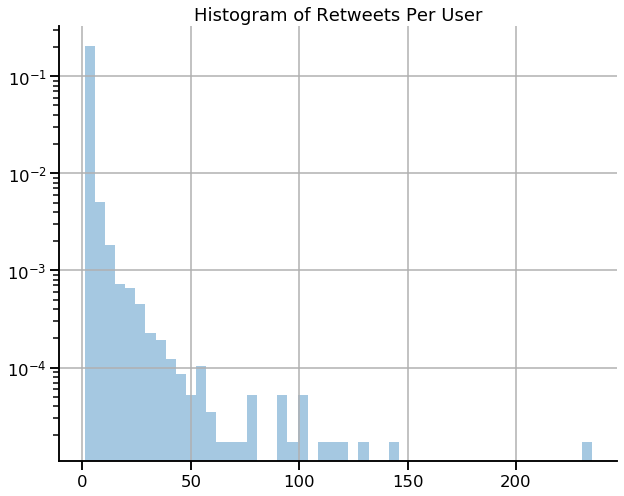

In [142]:
plt.figure(figsize=(10, 8))
ax = sns.distplot(pd.Series(res), hist=True, norm_hist=True, kde=False, rug=False)
ax.set_title("Histogram of Retweets Per User")
ax.set_yscale('log')
ax.grid()
sns.despine()

Text(0.5, 1.0, 'Histogram of Retweets Per User')

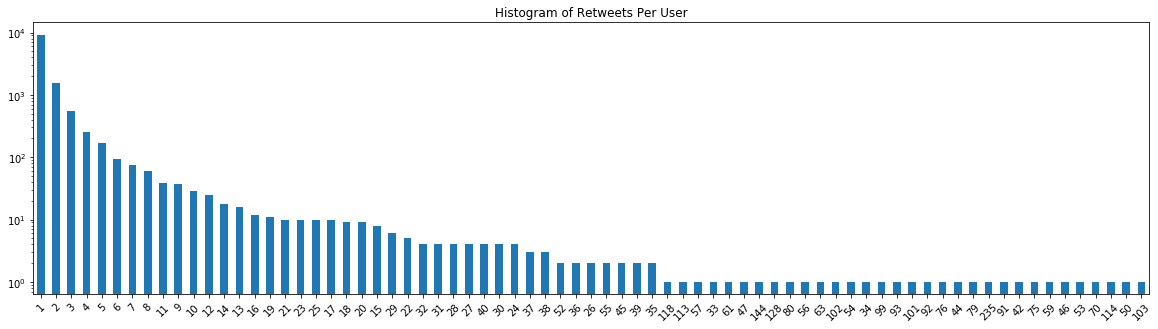

In [118]:
fig = plt.figure(figsize=(20,5))
pd.Series(res).value_counts().plot(kind="bar", rot=45, logy=True)
plt.title("Histogram of Retweets Per User")

In [53]:
(num_retweeters == 100).sum()

1

In [26]:
retweeted = tweets.set_index("id_str")[num_retweeters == 0]["retweeted_status"].apply(lambda tweet: tweet["id"]).unique()

In [93]:
len(tweets.set_index("id_str")[num_retweeters > 0])

426

In [30]:
len(set(retweeted) - set(tweets["id"].unique()))

541

In [44]:
retweeted = tweets.set_index("id_str")[num_retweeters == 0]["retweeted_status"].apply(
    lambda tweet: pd.Series({
        "id": tweet["id"], 
        "screen_name": tweet["user"]["screen_name"], 
        "created_at": tweet["created_at"]
    })
)

In [42]:
set(retweeted.loc[retweeted["screen_name"] == "realDonaldTrump", "id"].unique()) - set(tweets["id"].unique())

{1157094637624070144,
 1198027285921697793,
 1207055996687921152,
 1207277859519238154}

In [46]:
retweeted[retweeted["id"].isin({1157094637624070144,
 1198027285921697793,
 1207055996687921152,
 1207277859519238154})]

,id,screen_name,created_at
id_str,,,
1218168098966179842,1157094637624070144,realDonaldTrump,Fri Aug 02 01:03:54 +0000 2019
1211799266974478337,1198027285921697793,realDonaldTrump,Fri Nov 22 23:55:37 +0000 2019
1207723800823042050,1207055996687921152,realDonaldTrump,Tue Dec 17 21:52:30 +0000 2019
1207323726498402310,1207277859519238154,realDonaldTrump,Wed Dec 18 12:34:06 +0000 2019


In [47]:
tweets["created_at"].min()

'Fri Dec 20 00:16:46 +0000 2019'

In [54]:
import tweepy
CONSUMER_KEY="KQSoi13Fwql2VBwt5w4Fvwjuy"
CONSUMER_SECRET="pVEfydFKvFTwbBET7xiN22Q33UZXmUsWhlMy7P5IFvFWiH0CrH"
ACCESS_KEY="763797240561491968-HLCYojPtDbgISJa5ajjSuRlNYyPZI0m"
ACCESS_KEY_SECRET="Js2MSoe3UWHYCeaIOwB4EtTuaaXxJ6mJ98poXHG65rbY9"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_KEY_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, api_root="/1.1", search_root=)

In [59]:
tweet = api.statuses_lookup(["1218168098966179842"])

In [61]:
a = tweet[0]

In [64]:
print(a._json.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])


In [73]:
a.retweeted_status._json.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [75]:
a.retweeted_status.id

'Thank you Cincinnati, Ohio. Together, we are going to KEEP AMERICA GREAT! https://t.co/sKPAW8e8qN'

In [77]:
a.in_reply_to_user_id

In [83]:
for page in tweepy.Cursor(api.retweeters, id=a.retweeted_status.id).pages():
    print(len(page))

47


In [88]:
a.retweeted_status.place

In [89]:
import requests

In [ ]:
"https://api.twitter.com/1.1/statuses/home_timeline.json"

In [90]:
resp = requests.post("https://api.twitter.com/oauth2/token", data={"grant_type": "client_credentials"})
resp.json()

{'errors': [{'code': 99,
   'message': 'Unable to verify your credentials',
   'label': 'authenticity_token_error'}]}

In [91]:
api.home_timeline??